In [1]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

import pandas as pd
import numpy as np

In [2]:
s = pd.read_csv('Barres-1.csv')
s.head(3)

,Gene symbol,Description,Astrocytes,Neuron,Oligodendrocyte Precursor Cell,Newly Formed Oligodendrocyte,Myelinating Oligodendrocytes,Microglia,Endothelial Cells
0,Fos,V-fos FBJ murine osteosarcoma viral oncogene h...,3526.9,652.9,288.8,73.1,87.0,985.7,746.1
1,Cst3,Cystatin C (amyloid angiopathy and cerebral he...,3309.3,430.7,2527.0,327.7,655.3,49168.0,721.2
2,Apoe,Apolipoprotein E,3006.2,200.4,1175.7,142.1,216.1,2460.3,133.1


In [3]:
data = s.iloc[:, 2:]

In [4]:
s = data.T

In [5]:
s = StandardScaler().fit_transform(s)

In [6]:
pca = PCA(n_components=2)

In [7]:
h = pca.fit_transform(s)
h

array([[ 73.8732523 ,   5.12930647],
       [ 20.85229253, -11.40596542],
       [ 25.61350228,  -2.30266008],
       [ -5.87334979, -30.33598185],
       [-44.91033751, -44.32026072],
       [-53.6229306 ,  24.53047339],
       [-15.93242921,  58.70508822]])

In [8]:
labels = [
'Astrocytes', 
'Neuron',
'OPCs', 
'NFO', 
'MO', 
'Microglia', 
'ECs'
]

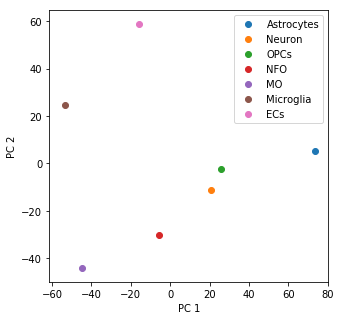

In [9]:
# PCA 2D projection의 시각화.
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 

# 각각의 label에 원하는 색깔을 입힌 플롯을 그리고 싶을 때 흔히 사용하는 코드입니다. 'zip'

for i in range(7):
    plt.scatter(h[i, 0], h[i, 1], label=labels[i])
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [10]:
pca.explained_variance_ratio_

array([0.33794798, 0.20441125])